<a href="https://colab.research.google.com/github/LPValente/TensorFlow2.0/blob/main/TF2_0_Long_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Install TensorFlow
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta1
2.12.0


In [33]:
# More imports
from tensorflow.keras.layers import Input,SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
  #y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)


In [35]:
# Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

# train the network
r = model.fit(
    X, Y,
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 1s 12ms/step - loss: 0.7544 - accuracy: 0.5168 - val_loss: 0.7022 - val_accuracy: 0.5052
Epoch 2/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6953 - accuracy: 0.5100 - val_loss: 0.6960 - val_accuracy: 0.5088
Epoch 3/100
79/79 [==============================] - 1s 7ms/step - loss: 0.6934 - accuracy: 0.5088 - val_loss: 0.6946 - val_accuracy: 0.5028
Epoch 4/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5124 - val_loss: 0.6951 - val_accuracy: 0.5108
Epoch 5/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6946 - accuracy: 0.5092 - val_loss: 0.6960 - val_accuracy: 0.5068
Epoch 6/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5180 - val_loss: 0.6960 - val_accuracy: 0.5108
Epoch 7/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5236 - val_loss: 0.6963 - val_accuracy: 0.5092
Epoch 8/100


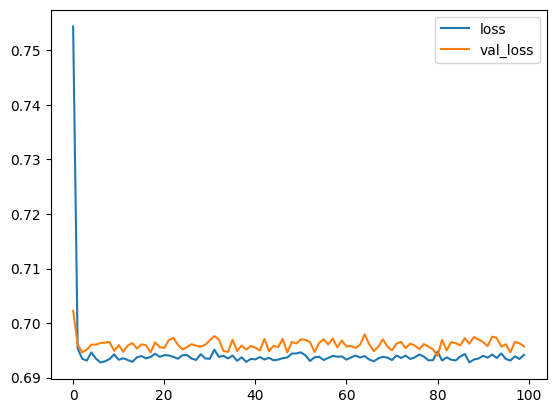

In [36]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

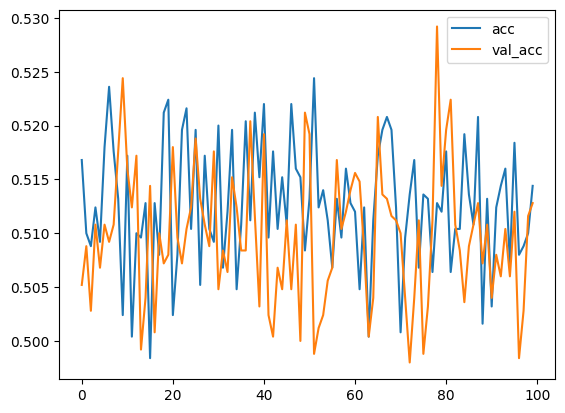

In [37]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [38]:
# Now try a simple RNN
inputs = np.expand_dims(X,-1)

# make the RNN
i = Input(shape=(T,D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(X)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    #optimizer='rmsprop',
    #optimizer='adam',
    optimizer=Adam(learning_rate=0.01),
    #optimizer=SGD(learning_rate=0.1, momentum=0.9),
    metrics=['accuracy'],
)

In [39]:
# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5
)

Epoch 1/200
79/79 [==============================] - 2s 9ms/step - loss: 0.6761 - accuracy: 0.5796 - val_loss: 0.6550 - val_accuracy: 0.6516
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6167 - accuracy: 0.6944 - val_loss: 0.5830 - val_accuracy: 0.7480
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5397 - accuracy: 0.7688 - val_loss: 0.5072 - val_accuracy: 0.7816
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.4748 - accuracy: 0.8064 - val_loss: 0.4566 - val_accuracy: 0.8104
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4193 - accuracy: 0.8316 - val_loss: 0.3980 - val_accuracy: 0.8376
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.3517 - accuracy: 0.8824 - val_loss: 0.3147 - val_accuracy: 0.9092
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2790 - accuracy: 0.9268 - val_loss: 0.2570 - val_accuracy: 0.9180
Epoch 8/200
7

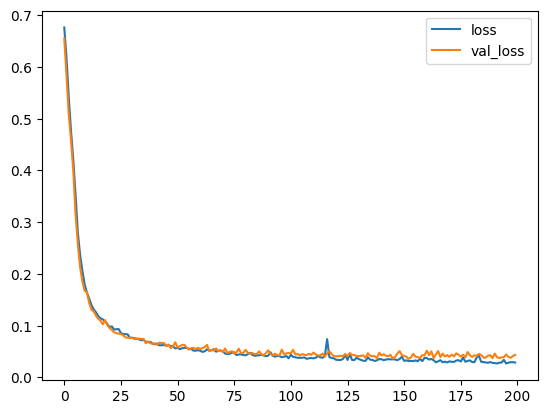

In [40]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

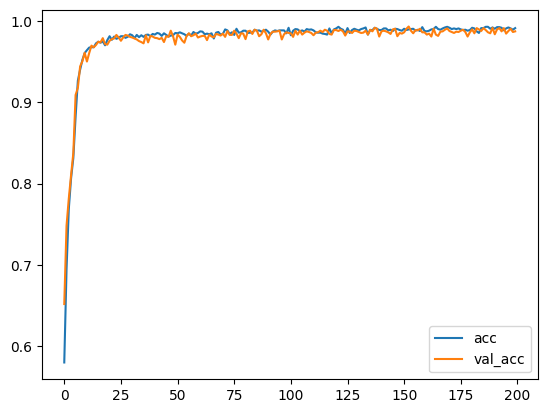

In [41]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [42]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  #y = get_label(x, -1, -2, -3) # short distance
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [43]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1,activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)
# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 9ms/step - loss: 0.6986 - accuracy: 0.5068 - val_loss: 0.6937 - val_accuracy: 0.5040
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6929 - accuracy: 0.5024 - val_loss: 0.6950 - val_accuracy: 0.4976
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5052 - val_loss: 0.6946 - val_accuracy: 0.5132
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6896 - accuracy: 0.5248 - val_loss: 0.6960 - val_accuracy: 0.5296
Epoch 5/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6852 - accuracy: 0.5476 - val_loss: 0.6835 - val_accuracy: 0.5536
Epoch 6/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6751 - accuracy: 0.5708 - val_loss: 0.6769 - val_accuracy: 0.5688
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6605 - accuracy: 0.6020 - val_loss: 0.6598 - val_accuracy: 0.6136
Epoch 8/200


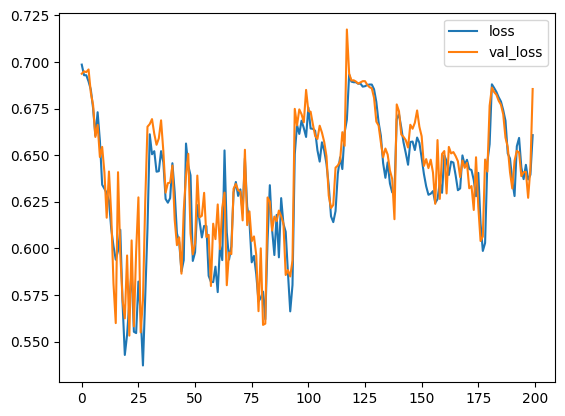

In [44]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

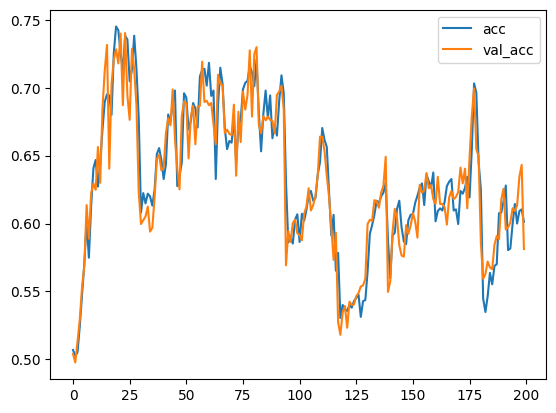

In [45]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [46]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1,activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)
# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 4s 15ms/step - loss: 0.6947 - accuracy: 0.5028 - val_loss: 0.6944 - val_accuracy: 0.4928
Epoch 2/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6938 - accuracy: 0.5096 - val_loss: 0.6928 - val_accuracy: 0.5104
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6937 - accuracy: 0.5012 - val_loss: 0.6932 - val_accuracy: 0.4864
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6937 - accuracy: 0.4868 - val_loss: 0.6928 - val_accuracy: 0.5144
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.5116 - val_loss: 0.6928 - val_accuracy: 0.5120
Epoch 6/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.5104 - val_loss: 0.6927 - val_accuracy: 0.5108
Epoch 7/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6935 - accuracy: 0.5028 - val_loss: 0.6931 - val_accuracy: 0.5064
Epoch 8/200

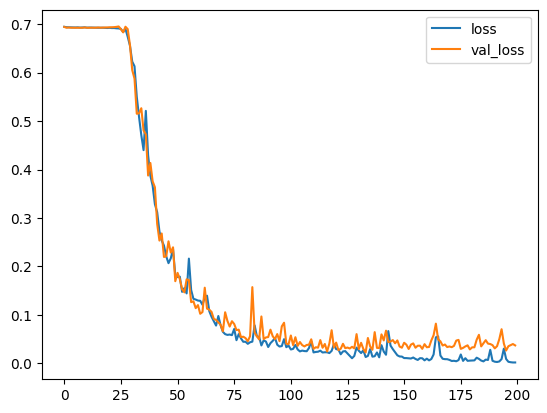

In [47]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

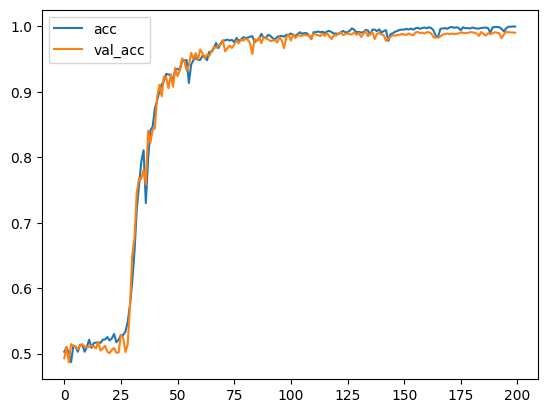

In [48]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [49]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X. append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y. append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [50]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1,activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)
# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 3s 20ms/step - loss: 0.7037 - accuracy: 0.5036 - val_loss: 0.6970 - val_accuracy: 0.4900
Epoch 2/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6955 - accuracy: 0.5024 - val_loss: 0.6938 - val_accuracy: 0.5040
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6949 - accuracy: 0.4980 - val_loss: 0.6954 - val_accuracy: 0.5068
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6948 - accuracy: 0.4992 - val_loss: 0.6946 - val_accuracy: 0.4968
Epoch 5/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6939 - accuracy: 0.5032 - val_loss: 0.6958 - val_accuracy: 0.5100
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6939 - accuracy: 0.5152 - val_loss: 0.6935 - val_accuracy: 0.5100
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6937 - accuracy: 0.5112 - val_loss: 0.6950 - val_accuracy: 0.5024
Epoch 8/20

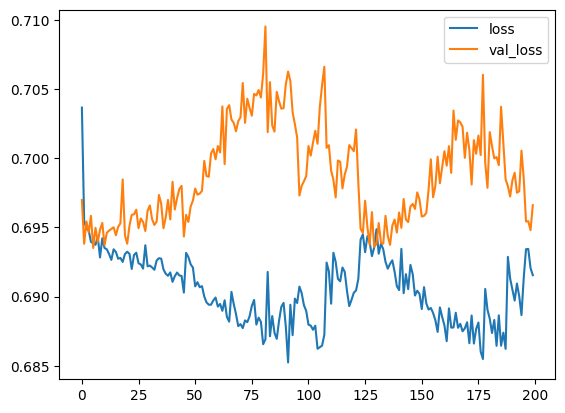

In [51]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

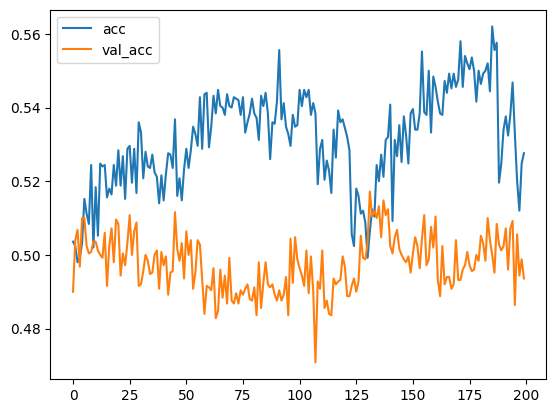

In [52]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [53]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1,activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)
# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 5s 21ms/step - loss: 0.6939 - accuracy: 0.5080 - val_loss: 0.6940 - val_accuracy: 0.5072
Epoch 2/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6931 - accuracy: 0.5160 - val_loss: 0.6953 - val_accuracy: 0.4772
Epoch 3/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6937 - accuracy: 0.4956 - val_loss: 0.6943 - val_accuracy: 0.4944
Epoch 4/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6935 - accuracy: 0.5060 - val_loss: 0.6940 - val_accuracy: 0.5052
Epoch 5/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6926 - accuracy: 0.5168 - val_loss: 0.6946 - val_accuracy: 0.4908
Epoch 6/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6926 - accuracy: 0.5192 - val_loss: 0.6947 - val_accuracy: 0.4972
Epoch 7/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6925 - accuracy: 0.5152 - val_loss: 0.6947 - val_accuracy: 0.4956
Epoch 

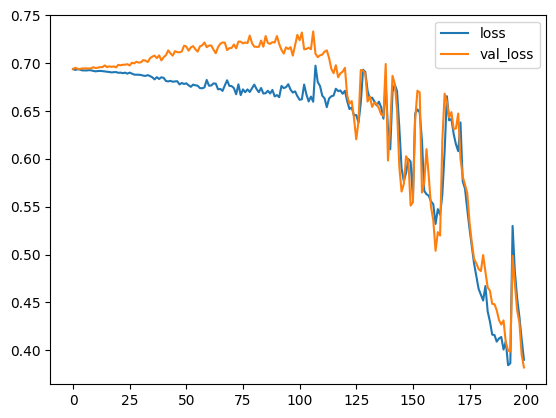

In [54]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

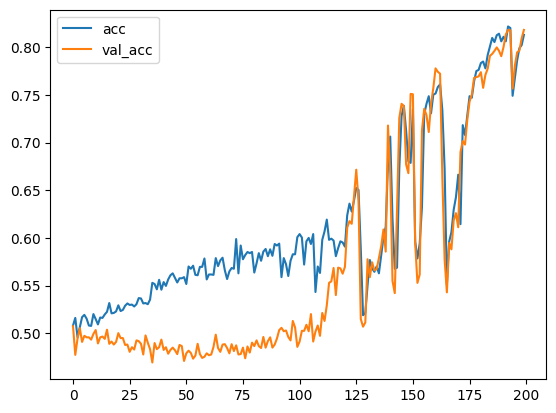

In [55]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [57]:
# Now test our GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1,activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)
# train the RNN
r = model.fit(
    inputs, Y,
    epochs=400,
    validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 6s 31ms/step - loss: 0.6968 - accuracy: 0.4992 - val_loss: 0.6937 - val_accuracy: 0.5096
Epoch 2/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6944 - accuracy: 0.5088 - val_loss: 0.6961 - val_accuracy: 0.4860
Epoch 3/400
79/79 [==============================] - 1s 14ms/step - loss: 0.6948 - accuracy: 0.5040 - val_loss: 0.6936 - val_accuracy: 0.4880
Epoch 4/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6936 - accuracy: 0.5160 - val_loss: 0.6954 - val_accuracy: 0.5072
Epoch 5/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6937 - accuracy: 0.5020 - val_loss: 0.6937 - val_accuracy: 0.5112
Epoch 6/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6938 - accuracy: 0.5100 - val_loss: 0.6941 - val_accuracy: 0.5012
Epoch 7/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6939 - accuracy: 0.5088 - val_loss: 0.6939 - val_accuracy: 0.5048
Epoch 

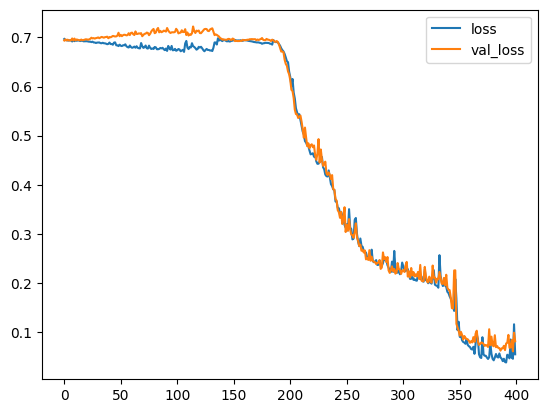

In [58]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

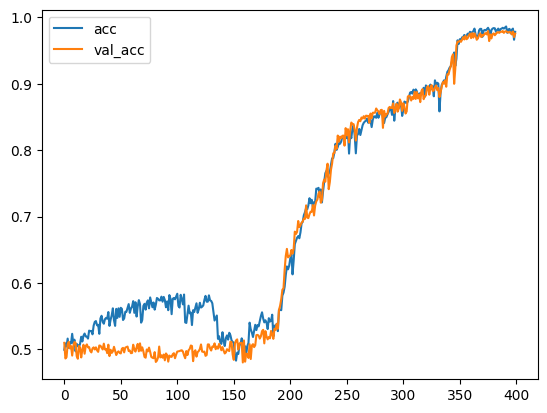

In [59]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [60]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [61]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1,activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)
# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 6s 41ms/step - loss: 0.6944 - accuracy: 0.5004 - val_loss: 0.6930 - val_accuracy: 0.5132
Epoch 2/200
79/79 [==============================] - 2s 23ms/step - loss: 0.6930 - accuracy: 0.5072 - val_loss: 0.6944 - val_accuracy: 0.4944
Epoch 3/200
79/79 [==============================] - 2s 19ms/step - loss: 0.6937 - accuracy: 0.5052 - val_loss: 0.6934 - val_accuracy: 0.4960
Epoch 4/200
79/79 [==============================] - 1s 17ms/step - loss: 0.6932 - accuracy: 0.5116 - val_loss: 0.6930 - val_accuracy: 0.5108
Epoch 5/200
79/79 [==============================] - 3s 33ms/step - loss: 0.6931 - accuracy: 0.5140 - val_loss: 0.6934 - val_accuracy: 0.4984
Epoch 6/200
79/79 [==============================] - 2s 28ms/step - loss: 0.6937 - accuracy: 0.5088 - val_loss: 0.6937 - val_accuracy: 0.4908
Epoch 7/200
79/79 [==============================] - 2s 30ms/step - loss: 0.6930 - accuracy: 0.5092 - val_loss: 0.6934 - val_accuracy: 0.5012
Epoch 

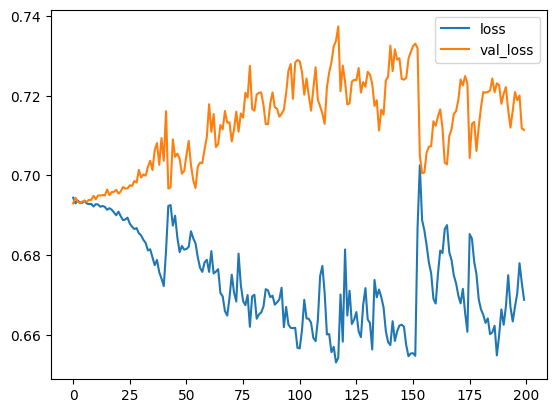

In [62]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

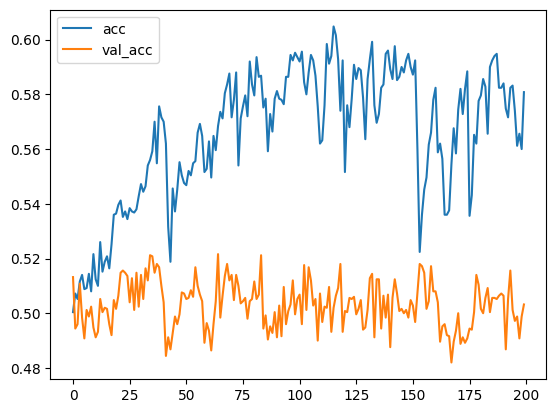

In [63]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [64]:
# Now try a LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T,D))

# method 2
x= LSTM(5, return_sequences=True)(i)
x = GlobalMaxPooling1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 4s 24ms/step - loss: 0.6962 - accuracy: 0.5080 - val_loss: 0.6973 - val_accuracy: 0.4936
Epoch 2/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6935 - accuracy: 0.5100 - val_loss: 0.6936 - val_accuracy: 0.4940
Epoch 3/200
79/79 [==============================] - 2s 22ms/step - loss: 0.6939 - accuracy: 0.5020 - val_loss: 0.6935 - val_accuracy: 0.4912
Epoch 4/200
79/79 [==============================] - 2s 28ms/step - loss: 0.6930 - accuracy: 0.5192 - val_loss: 0.6937 - val_accuracy: 0.5004
Epoch 5/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6931 - accuracy: 0.5140 - val_loss: 0.6948 - val_accuracy: 0.4964
Epoch 6/200
79/79 [==============================] - 2s 23ms/step - loss: 0.6928 - accuracy: 0.4952 - val_loss: 0.6936 - val_accuracy: 0.4984
Epoch 7/200
79/79 [==============================] - 2s 23ms/step - loss: 0.6925 - accuracy: 0.5248 - val_loss: 0.6932 - val_accuracy: 0.5136
Epoch 

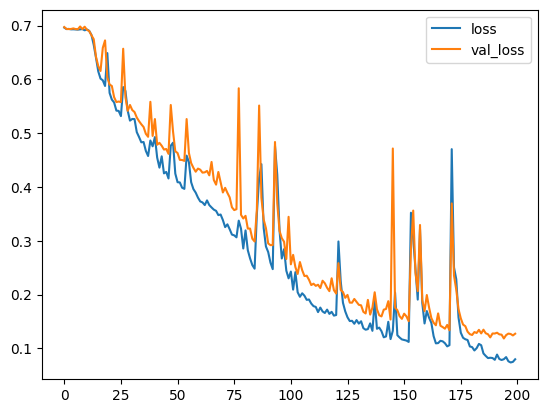

In [65]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

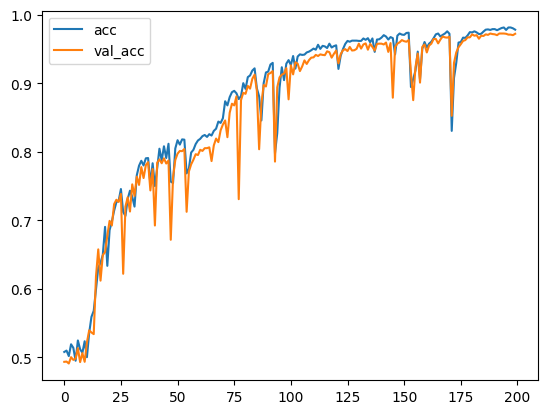

In [66]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()